In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)

# reflect the tables


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


<function matplotlib.pyplot.show(close=None, block=None)>

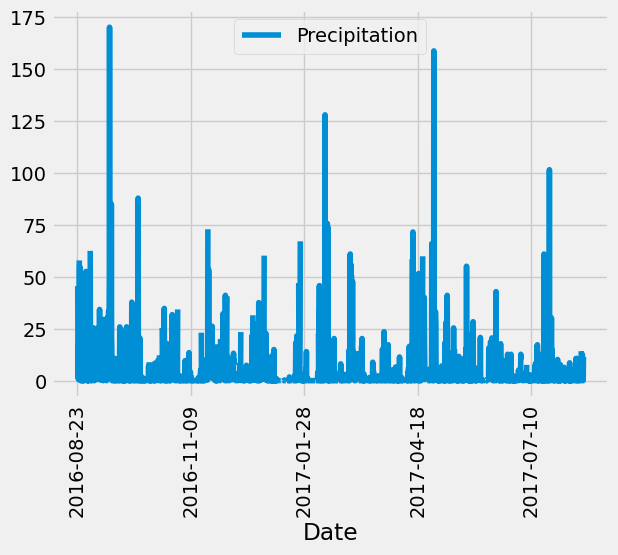

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
year_ago = recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_score_df = pd.DataFrame(prcp_score, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date
prcp_score_df = prcp_score_df.sort_values(by='Date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_score_df.set_index('Date')
prcp_score_df.plot(x='Date', y='Precipitation', rot=90)
plt.show



In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = prcp_score_df['Precipitation'].describe()
print(summary_stats)

count    2021.000000
mean        4.505888
std        11.713487
min         0.000000
25%         0.000000
50%         0.500000
75%         3.300000
max       170.200000
Name: Precipitation, dtype: float64


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(measurement.station).distinct().count()
print(total_stations)


9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp = session.query(func.min(measurement.tobs)). \
    filter(measurement.station == 'USC00519281').all()

highest_temp = session.query(func.max(measurement.tobs)). \
    filter(measurement.station == 'USC00519281').all()

average_temp = session.query(func.avg(measurement.tobs)). \
    filter(measurement.station == 'USC00519281').all()

print(f'{lowest_temp}, {highest_temp}, {average_temp}')

[(12.2,)], [(29.4,)], [(22.03582251082252,)]


Text(0.5, 0, 'Temperature')

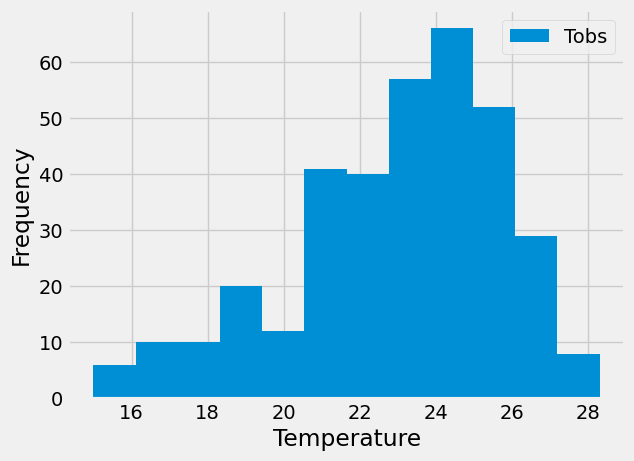

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_stations = session.query(measurement.tobs). \
    filter(measurement.station == 'USC00519281').filter(measurement.date >year_ago).all()

active_stations_df = pd.DataFrame(active_stations, columns=['Tobs'])

active_stations_df.plot.hist(bins=12)
plt.xlabel('Temperature')




# Close Session

In [22]:
# Close Session
session.close()